# Analyse des installations nucléaires

Dans ce jupyter, on va regarder les installations nucléaires, plus particulièrement ceux d'EDF. Pour ce faire, on procédera à la création de plusieurs graphiques et une carte pour observer ces différentes installations. On va tout d'abord installer un environnement virtuel pour installer les librairies nécessaires à l'analyse de ces données.

In [39]:
import pandas as pd
import plotnine as plt
import scipy as ss

# Importation des données

Nous allons ici importer les données sur les centrales nucléaires avec le fichier CSV *NUC_PROD_INST.csv*. On utilise la méthdode *read_csv* de pandas pour importer ce fichier.

In [40]:
# Importation des données
dataset_nuc = pd.read_csv("../Data/NUC_PROD_INST.csv",
                          sep=",",
                          header=0,
                          encoding="utf-8")

In [41]:
# Vérification du succès de l'opération
dataset_nuc.head(n=5)

,nominstallation,codeeicresourceobject,codeiris,commune,epci,departement,region,dateraccordement,datemiseenservice,datedebutversion,...,moderaccordement,combustible,combustiblessecondaires,technologie,typestockage,puismaxinstallee,puismaxrac,nbgroupes,regime,gestionnaire
0,BUGEYN04 - GROUPE 04 DE LA CENTRALE NUCLEAIRE ...,17W100P100P00982,13900000,Saint-Vulbas,CC de la Plaine de l'Ain,Ain,Auvergne-Rhône-Alpes,01/03/1979,01/07/1979,01/01/2007,...,DIRECT,URANIUM,NaN,FISSION NUCLEAIRE,NaN,880000.0,880000.0,1.0,En service,RTE
1,BUGEYN02 - GROUPE 02 DE LA CENTRALE NUCLEAIRE ...,17W100P100P00966,13900000,Saint-Vulbas,CC de la Plaine de l'Ain,Ain,Auvergne-Rhône-Alpes,01/05/1978,01/03/1979,01/01/2007,...,DIRECT,URANIUM,NaN,FISSION NUCLEAIRE,NaN,910000.0,910000.0,1.0,En service,RTE
2,BUGEYN03 - GROUPE 03 DE LA CENTRALE NUCLEAIRE ...,17W100P100P00974,13900000,Saint-Vulbas,CC de la Plaine de l'Ain,Ain,Auvergne-Rhône-Alpes,01/09/1978,01/03/1979,01/01/2007,...,DIRECT,URANIUM,NaN,FISSION NUCLEAIRE,NaN,910000.0,910000.0,1.0,En service,RTE
3,BUGEYN05 - GROUPE 05 DE LA CENTRALE NUCLEAIRE ...,17W100P100P01004,13900000,Saint-Vulbas,CC de la Plaine de l'Ain,Ain,Auvergne-Rhône-Alpes,01/07/1979,01/01/1980,01/01/2007,...,DIRECT,URANIUM,NaN,FISSION NUCLEAIRE,NaN,880000.0,880000.0,1.0,En service,RTE
4,CRUA5N01 - GROUPE 01 DE LA CENTRALE NUCLEAIRE ...,17W100P100P0115S,70760000,Cruas,CC Ardèche Rhône Coiron,Ardèche,Auvergne-Rhône-Alpes,01/04/1983,02/04/1984,25/09/2013,...,DIRECT,URANIUM,NaN,FISSION NUCLEAIRE,NaN,915000.0,915000.0,1.0,En service,RTE


In [42]:
# Prise en compte de la structure
print("---- Dimension de notre dataset ----")
print(dataset_nuc.shape)
print("---------------------------------")

print("---- Les colonnes et leurs types ----")
print(dataset_nuc.dtypes)
print("-------------------------------------")


---- Dimension de notre dataset ----
(56, 22)
---------------------------------
---- Les colonnes et leurs types ----
nominstallation             object
codeeicresourceobject       object
codeiris                     int64
commune                     object
epci                        object
departement                 object
region                      object
dateraccordement            object
datemiseenservice           object
datedebutversion            object
postesource                 object
tensionraccordement         object
moderaccordement            object
combustible                 object
combustiblessecondaires    float64
technologie                 object
typestockage               float64
puismaxinstallee           float64
puismaxrac                 float64
nbgroupes                  float64
regime                      object
gestionnaire                object
dtype: object
-------------------------------------


In [43]:
# Description de notre jeu de données
dataset_nuc.describe()

,codeiris,combustiblessecondaires,typestockage,puismaxinstallee,puismaxrac,nbgroupes
count,5.600000e+01,0.0,0.0,5.600000e+01,5.600000e+01,56.0
mean,4.128140e+08,NaN,NaN,1.095893e+06,1.095893e+06,1.0
std,2.539704e+08,NaN,NaN,2.252314e+05,2.252314e+05,0.0
min,1.390000e+07,NaN,NaN,8.800000e+05,8.800000e+05,1.0
25%,2.418276e+08,NaN,NaN,9.100000e+05,9.100000e+05,1.0
50%,3.982251e+08,NaN,NaN,9.150000e+05,9.150000e+05,1.0
75%,5.927301e+08,NaN,NaN,1.315000e+06,1.315000e+06,1.0
max,8.607700e+08,NaN,NaN,1.500000e+06,1.500000e+06,1.0


# Analyse exploratoire des installations nucléaires

Maintenant que nous avons importé nos données, on va observer la puissance de ces centrales et où est-ce que ça se situe.

## La localisation de ces centrales

Dans cette sous-partie, on va regarder les installations de ces centrales nucléaires. Pour ce faire, on va d'abord calculer les fréquences par département puis par région. Ensuite, on fera des visuels graphiques pour observer facilement ces différentes centrales.

### Tableau effectifs et en pourcentage

In [44]:
# Observation par département
tableau_dept = dataset_nuc["departement"].value_counts()

In [45]:
# Vérification du succès de l'opération
tableau_dept

departement
Nord               6
Seine-Maritime     6
Ain                4
Ardèche            4
Indre-et-Loire     4
Moselle            4
Loiret             4
Gironde            4
Drôme              4
Isère              2
Ardennes           2
Aube               2
Cher               2
Manche             2
Loir-et-Cher       2
Tarn-et-Garonne    2
Vienne             2
Name: count, dtype: int64

In [46]:
# Observation par région
tableau_reg = dataset_nuc["region"].value_counts()

In [47]:
# Vérification du succès de l'opération
tableau_reg

region
Auvergne-Rhône-Alpes    14
Centre-Val de Loire     12
Grand Est                8
Normandie                8
Nouvelle-Aquitaine       6
Hauts-de-France          6
Occitanie                2
Name: count, dtype: int64

### Visuels graphiques avec [plotnine](https://plotnine.org/) (ggplot)

#### Sans le tableau d'effectif

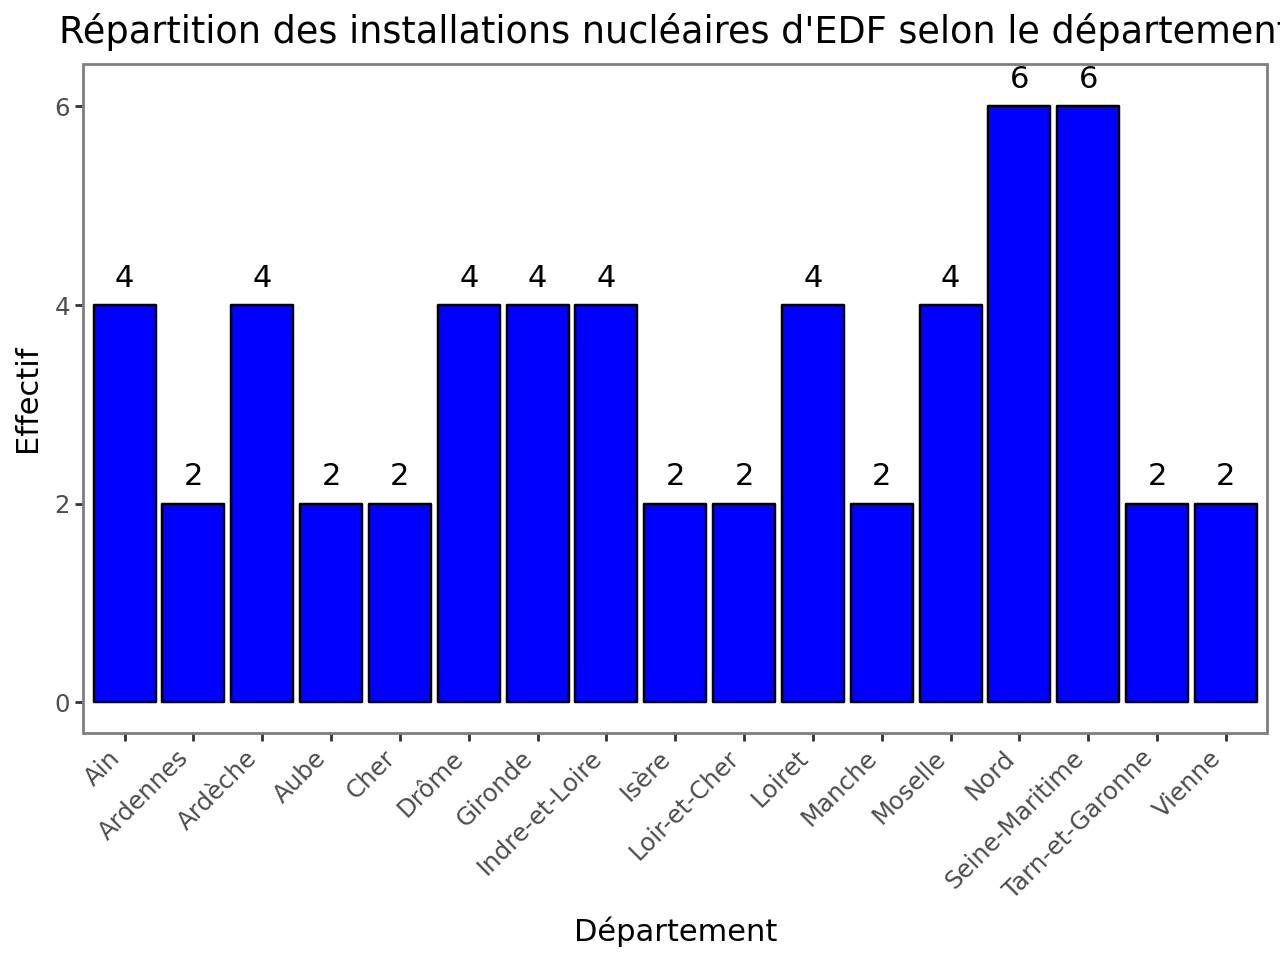

In [58]:
# Création du graphique sans le tableau 
(
    plt.ggplot(dataset_nuc, plt.aes("factor(departement)")) # Définition des données + des variables
    + plt.geom_bar(fill="blue", color="black") # Création d'un diagramme en barre avec la couleur bleu et des bordures noirs
    + plt.geom_text(
        plt.aes(label=plt.after_stat("count")), stat="count", nudge_y=0.125, va="bottom" # Ajout des étiquettes de données
    )
    +plt.theme_bw() # Mettre un thème noir et blanc
    +plt.theme(axis_text_x=plt.element_text(rotation=45, hjust=1), # Réglage des angles de nos modalités de l'axe X
               panel_grid=plt.element_blank())
    +plt.labs(title="Répartition des installations nucléaires d'EDF selon le département",
              x = "Département",
              y = "Effectif")
)

#### Avec le tableau d'effectif

In [54]:
# Transformation en DataFrame de notre tableau effectif
tableau_dept = pd.DataFrame(tableau_dept)
# Ajout de la colonne départemen
tableau_dept["departement"] = tableau_dept.index

In [55]:
# Vérification du succès de l'opération
tableau_dept

,count,departement
departement,,
Nord,6,Nord
Seine-Maritime,6,Seine-Maritime
Ain,4,Ain
Ardèche,4,Ardèche
Indre-et-Loire,4,Indre-et-Loire
Moselle,4,Moselle
Loiret,4,Loiret
Gironde,4,Gironde
Drôme,4,Drôme


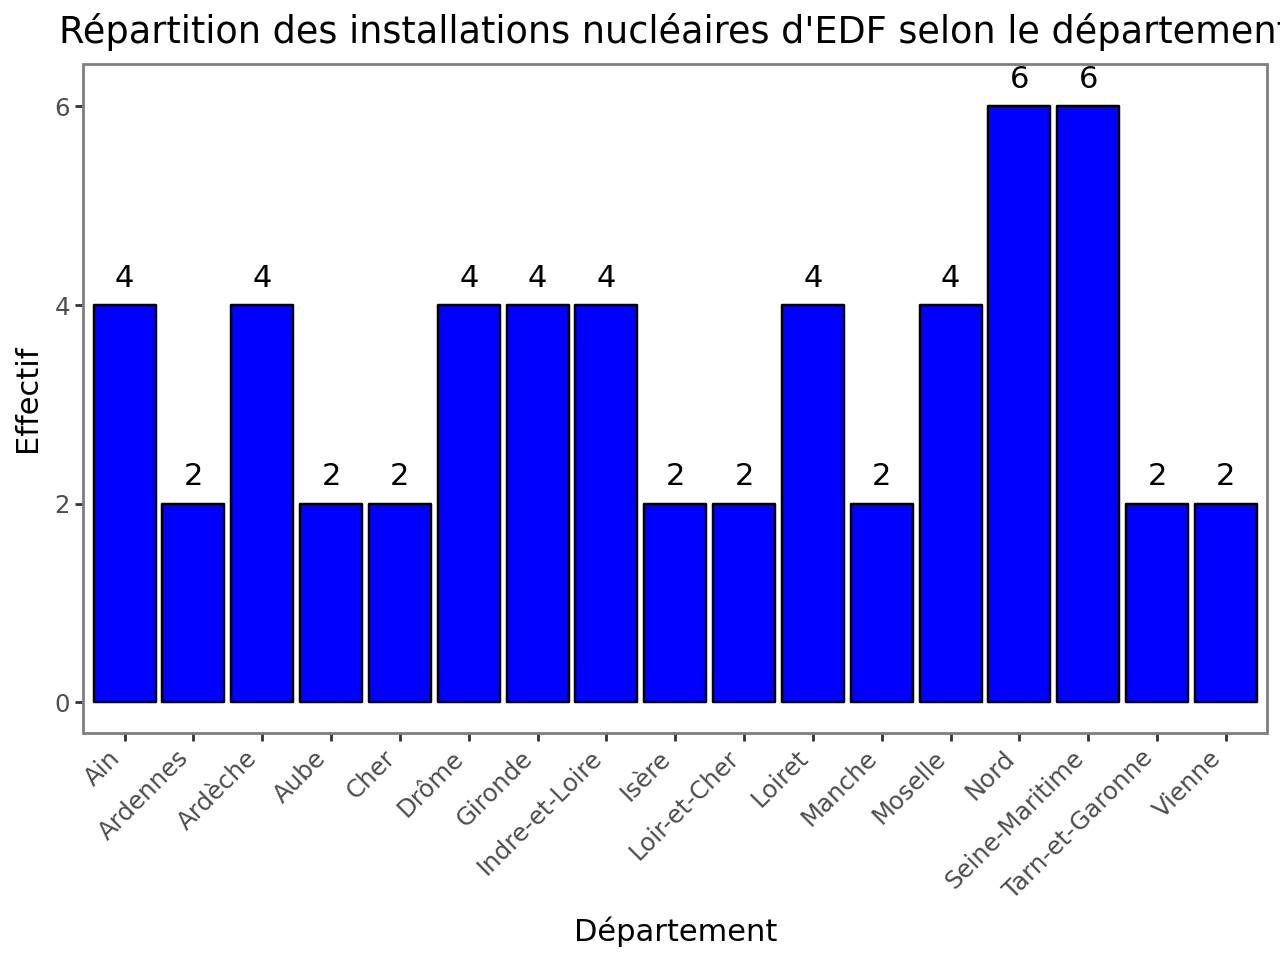

In [59]:
# Création du graphique avec le tableau 
(
    plt.ggplot(tableau_dept, plt.aes(x="departement", y="count")) # Définition des données + des variables
    + plt.geom_bar(stat="identity", fill="blue", color="black") # Création d'un diagramme en barre avec la couleur bleu et des bordures noirs
    + plt.geom_text(
        plt.aes(label="count"), nudge_y=0.125, va="bottom" # Ajout des étiquettes de données
    )
    +plt.theme_bw() # Mettre un thème noir et blanc
    +plt.theme(axis_text_x=plt.element_text(rotation=45, hjust=1), # Réglage des angles de nos modalités de l'axe X
               panel_grid=plt.element_blank())
    +plt.labs(title="Répartition des installations nucléaires d'EDF selon le département",
              x = "Département",
              y = "Effectif")
)

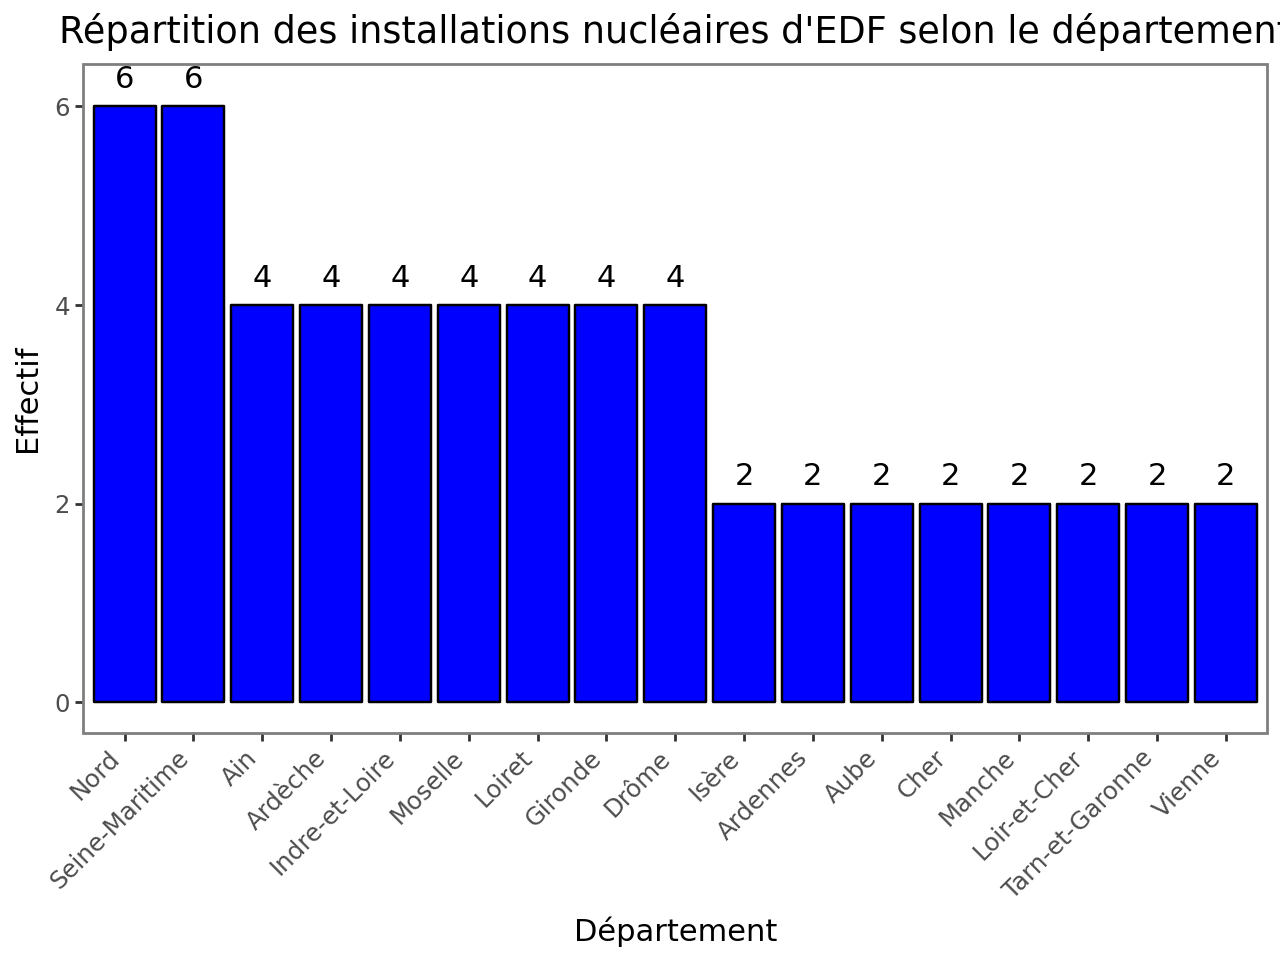

In [60]:
# Mettre dans l'ordre décroissante
# Création du graphique avec le tableau 
(
    plt.ggplot(tableau_dept, plt.aes(x="departement", y="count")) # Définition des données + des variables
    + plt.geom_bar(stat="identity", fill="blue", color="black") # Création d'un diagramme en barre avec la couleur bleu et des bordures noirs
    + plt.geom_text(
        plt.aes(label="count"), nudge_y=0.125, va="bottom" # Ajout des étiquettes de données
    )
    +plt.scale_x_discrete(limits=tableau_dept.index.tolist())
    +plt.theme_bw() # Mettre un thème noir et blanc
    +plt.theme(axis_text_x=plt.element_text(rotation=45, hjust=1), # Réglage des angles de nos modalités de l'axe X
               panel_grid=plt.element_blank())
    +plt.labs(title="Répartition des installations nucléaires d'EDF selon le département",
              x = "Département",
              y = "Effectif")
)